Imports

In [ ]:
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# %pip install -U kaleido

Creating and formating dataframes in the global scale

In [ ]:
def import_data():
  
  """Function imports all 6 datasets and formats them by removing some rows, renaming some items, and splitting the data into multiple dataframes before returning it as 10 dataframes"""

  cancer_data = pd.read_csv('/content/expanded_cancer_data.csv')
  test_data = pd.read_csv('/content/shortened_cancer_data.csv')
  unisex_population_data = pd.read_csv('/content/us_unisex_pop_est.csv')
  fem_population_data = pd.read_csv('/content/us_fem_pop_est.csv')
  male_population_data = pd.read_csv('/content/us_male_pop_est.csv')
  sample_data = pd.read_csv('/content/samadult.csv')
  
  datasets = []

  test_data = test_data[['Cancer Sites', 'Year', 'Sex Code', 'Age Groups', 'Count']]
  female_test_data = test_data[test_data['Sex Code'] == 'F']
  male_test_data = test_data[test_data['Sex Code'] == 'M']
  datasets.append(test_data)
  datasets.append(female_test_data)
  datasets.append(male_test_data)

  cancer_data = cancer_data[['Cancer Sites', 'Year', 'Sex Code', 'Age Groups', 'Count']]
  female_cancer_data = cancer_data[cancer_data['Sex Code'] == 'F']
  male_cancer_data = cancer_data[cancer_data['Sex Code'] == 'M']
  datasets.append(cancer_data)
  datasets.append(female_cancer_data)
  datasets.append(male_cancer_data)

  sample_adult_data = sample_data[['SEX', 'AGE_P', 'ALDURA29', 'ALDURB29', 'ALDURA12', 'ALDURB12', 'SMKREG', 'CIGSDA1','CIGDAMO', 'ECIGEV2', 'ECIGCUR2', 'ECIG30D2', 'ALC1YR',
                                   'ALCAMT', 'ALCSTAT', 'ALC5UPY1', 'BINGE1', 'CNKIND1', 'CNKIND2', 'CNKIND3', 'CNKIND4', 'CNKIND5', 'CNKIND6', 'CNKIND7', 'CNKIND8', 'CNKIND9',  
                                   'CNKIND10', 'CNKIND11', 'CNKIND12', 'CNKIND13', 'CNKIND14', 'CNKIND15', 'CNKIND16', 'CNKIND17', 'CNKIND18', 'CNKIND19', 'CNKIND20',
                                   'CNKIND21', 'CNKIND22', 'CNKIND23', 'CNKIND24', 'CNKIND25', 'CNKIND26', 'CNKIND27', 'CNKIND28', 'CNKIND29', 'CNKIND30', 'SMKEV',
                                   'CIGAREV2',  'PIPEV2', 'SMKLSTB1', 'CIGCUR2', 'PIPECUR2', 'SMKLSCR2', 'SMKNOW', 'SMKSTAT2']]
  sample_adult_data = sample_adult_data[sample_adult_data['AGE_P'] < 50]
  sample_adult_data['SEX'].replace({1: 'M', 2: 'F'}, inplace=True)
  datasets.append(sample_adult_data)

  unisex_population_data = unisex_population_data[['Unnamed: 0', '2000', '2001', '2002', '2003', '2004', 
                                                   '2005', '2006', '2007', '2008', '2009', '1-Jul-10', 
                                                   '2011', '2012', '2013', '2014', '7-Jul', '2016', 
                                                   '2017', '2018']]
  unisex_population_data.rename(columns={'Unnamed: 0': 'Age Groups', '1-Jul-10': '2010', '7-Jul': '2015'}, inplace=True)
  unisex_population_data = unisex_population_data.replace(['Under 5 years'],'0 to 4 years')
  unisex_population_data = unisex_population_data.replace(['BOTH SEXES'], 'Totals')
  unisex_population_data = unisex_population_data.dropna()
  datasets.append(unisex_population_data)

  fem_population_data = fem_population_data[['Unnamed: 0', '2000', '2001', '2002', 
                                             '2003', '2004', '2005', '2006', 
                                             '2007', '2008', '2009', '1-Jul-10', 
                                             '2011', '2012', '2013', '2014', 
                                             '2015', '2016', '2017', '2018']]
  fem_population_data.rename(columns={'Unnamed: 0': 'Age Groups', '1-Jul-10':'2010'}, inplace=True)
  fem_population_data = fem_population_data.replace(['Under 5 years'],'0 to 4 years')
  fem_population_data = fem_population_data.replace(['FEMALE'], 'Totals')
  fem_population_data = fem_population_data.dropna()
  datasets.append(fem_population_data)

  male_population_data = male_population_data[['Unnamed: 0', '2000', '2001', 
                                              '2002', '2003', '2004', '2005', 
                                               '2006', '2007', '2008', '2009', 
                                               '1-Jul-10', '2011', '2012', '2013',
                                               '2014', '2015', '2016', '2017',
                                               '2018']]
  male_population_data.rename(columns={'Unnamed: 0': 'Age Groups', '1-Jul-10':'2010'}, inplace=True)
  male_population_data = male_population_data.replace(['Under 5 years'],'0 to 4 years')
  male_population_data = male_population_data.replace(['MALE'], 'Totals')
  male_population_data = male_population_data.dropna()
  datasets.append(male_population_data)


  return datasets

In [ ]:
def rename_age_groups(unisex_population_data, male_population_data, fem_population_data):
  """Takes the population data and renames the age groups to be the same as the age groups in the cancer data."""

  mp = male_population_data
  fp = fem_population_data
  up = unisex_population_data

  all_age_groups = [x for x in mp['Age Groups']]
  age_groups = [all_age_groups[0]]

  r = 0
  for group in all_age_groups[1:]:
    r += 1
    group = group[:-6]
    group = group.replace(' to ', '-')
    mp['Age Groups'][r] = group
    fp['Age Groups'][r] = group
    up['Age Groups'][r] = group

  return (mp, up, fp)


def append_frequency(male_pop_data, female_pop_data, cancer_data):
  """Takes male and female population data and uses it to append a frequency column to the cancer data, of the count of
  that type of cancer divided by the population of people in the US of that age group of that sex in that year."""
  cd = cancer_data
  mp = male_pop_data[:][:11]
  fp = female_pop_data[:][:11]

  mp.set_index('Age Groups', inplace=True)
  fp.set_index('Age Groups', inplace=True)

  cd = cd[(cd['Year'] > 1999)]
  cd = cd[(cd['Age Groups'] != '< 1 year') & (cd['Age Groups'] != '1-4 years')]
  cd = cd.dropna()
  mp = mp.loc[:, mp.columns != '2019']
  fp = fp.loc[:, fp.columns != '2019']

  cd['Frequency'] = 0

  for ind in cd.index:
    ages = cd['Age Groups'][ind][:-6]
    year = str(int(cd.loc[ind, 'Year']))
    sex = cd.loc[ind, 'Sex Code']
    fem_pop = int((fp.loc[ages, year]).replace(',', ''))
    male_pop = int((mp.loc[ages, year]).replace(',', ''))
    count = int(cd.loc[ind, 'Count'])
    if sex == 'F':
      cd.loc[ind, 'Frequency'] = count / fem_pop
    if sex == 'M':
      cd.loc[ind, 'Frequency'] = count / male_pop
  
  return cd

TEST BLOCK. Run the following block after the three boxes above if youre testing. That'll make the datasets into global variables so you can acess them anywhere

In [ ]:
datasets = import_data()
test_data, female_test_data, male_test_data, cancer_data, female_cancer_data, male_cancer_data, sample_data, unisex_population_data, fem_population_data, male_population_data = datasets
print('data imports completed')
unisex_population_data, male_population_data, fem_population_data = rename_age_groups(unisex_population_data, male_population_data, fem_population_data)
cancer_data = append_frequency(male_population_data, fem_population_data, cancer_data)
print('data formatting completed')

data imports completed
data formatting completed


Visualizations: Alcohol/Liver Cancer graph
                Cancer prevelance over time
                Smoking Cancer prevelance

In [ ]:
def merging_male_and_female_pop(male_pop, female_pop):
  """
  Returns the merged data set of male and female population counts with
  with applicable rows.
  """

  cancer_subset_ages_male = male_pop.iloc[0:11, :]
  cancer_subset_ages_fem = female_pop.iloc[0:11, :]
  merged = cancer_subset_ages_male.append(cancer_subset_ages_fem,
                                          ignore_index=True)
    
  return merged

In [ ]:
def cancer_prev(cancer_data):
  """
  Returns series of frequencies based on each year by sum. Looks at all cancers
  and cumulated prevalence from 2000-2018.
  """
  
  all_cancer = cancer_data[cancer_data['Cancer Sites'] == 
                           'All Invasive Cancer Sites Combined']
  all_cancer_2000s = all_cancer[all_cancer['Year'] >= 2000]
  all_cancer_summed_sex = all_cancer_2000s.groupby('Year')['Frequency'].sum()

  return all_cancer_summed_sex


def lung_cancer(cancer_data):
  """
  Returns filtered cancer_data set with respect to lung cancer and the
  applicable age groups
  """

  lung_cancer = cancer_data[cancer_data['Cancer Sites'] == 'Lung and Bronchus']
  lung_cancer.drop(lung_cancer[lung_cancer['Age Groups'] == 
                               '< 1 year'].index, inplace = True)
  lung_cancer.drop(lung_cancer[lung_cancer['Age Groups'] == 
                               '1-4 years'].index, inplace = True)
  lung_cancer.drop(lung_cancer[lung_cancer['Age Groups'] == 
                               '5-9 years'].index, inplace = True)

  return lung_cancer
 

def liver_cancer(cancer_data):
  """
  Returns filtered cancer_data set with respect to liver cancer and the
  applicable age groups
  """

  liver_cancer = cancer_data[cancer_data['Cancer Sites'] == 'Liver']
  liver_cancer.drop(liver_cancer[liver_cancer['Age Groups'] == 
                                 '< 1 year'].index, inplace = True)
  liver_cancer.drop(liver_cancer[liver_cancer['Age Groups'] == 
                                 '1-4 years'].index, inplace = True)
  liver_cancer.drop(liver_cancer[liver_cancer['Age Groups'] == 
                                 '5-9 years'].index, inplace = True)
  liver_cancer.drop(liver_cancer[liver_cancer['Age Groups'] == 
                                 '10-14 years'].index, inplace = True)
  liver_cancer.drop(liver_cancer[liver_cancer['Age Groups'] == 
                                 '15-19 years'].index, inplace = True)
  liver_cancer.drop(liver_cancer[liver_cancer['Age Groups'] == 
                                 '20-24 years'].index, inplace = True)

  return liver_cancer

 
def plot_cancer_prev(grouped_cancer):
  """ Plots cancer prevalence from 2000-2018 for people under 50 years old
  """

  fig1 = px.line(grouped_cancer, 
                 title='Cancer Prevalence from 2000-2018 under 50 Years Old')

  # fig1.write_image("Cancer-Trends.png")
  

def plot_lung_cancer(lung_cancer):
  """ Plots lung cancer frequency by year broken down by age groups and sex
  """

  fig2 = px.area(lung_cancer, x="Year", y="Frequency", color="Sex Code",
                 facet_col="Age Groups", facet_col_wrap=4,
                category_orders={'Sex Code': ['F', 'M']},
                 title='Lung Cancer Frequency by Age Group')
  
  # fig2.write_image("Lung-Cancer-Broken-Down.png")
  

def plot_liver_cancer(liver_cancer):
  """ Plots liver cancer frequency by year broken down by age groups and sex
  """

  fig3 = px.area(liver_cancer, x="Year", y="Frequency", color="Sex Code",
                 facet_col="Age Groups", facet_col_wrap=3,
                category_orders={'Sex Code': ['F', 'M']},
                 title='Liver Cancer Frequency by Age Group')
  # fig3.write_image("Liver-Cancer-Broken-Down.png")
  
  
  



ALCOHOL AS A RISK FACTOR FOR CANCER (Matt's Part)- The cancers associated with alcohol according to the National Cancer Insitute were selected from the NHIS 2018 sample data. 

What type of cancer was most prevalent among the participants in the NHIS data?

In [ ]:
def filter_for_cancer(data):
  """
  Takes the NHIS csv data as a parameter, and returns a new dataset containing
  the following columns: 'AGE_P', 'SEX', and 'CNKIND1-30'
  """
  filtered_df = data.loc[:,'CNKIND1':'CNKIND30']
  filtered_df = filtered_df.dropna(how='all')
  return filtered_df

def get_cancer_counts(filtered_data):
  """
  Takes the filtered_data (via filter_for_cancer) and returns a new DataFrame
  with two columns: 'Cancer Type' and 'Case Count'. The 'Cancer Type' column
  holds the name of the cancer type (string) and the 'Case Count' column holds
  the count of cases of the corresponding type of cancer.
  """
  count_list = []
  for cancer in list(filtered_data.columns):
    case_filter = filtered_data[filtered_data[cancer] == 1.0]
    count_list.append(case_filter[cancer].count())

  cancer_list = ['Bladder', 'Blood', 'Bone', 'Brain', 'Breast', 'Cervix',
                 'Colon', 'Esophagus', 'Gallbladder', 'Kidney',
                 'Larynx-Windpipe', 'Leukemia', 'Liver', 'Lung', 'Lymphoma',
                 'Melanoma', 'Mouth', 'Ovary', 'Pancreas', 'Prostate', 'Rectum',
                 'Skin (non-melanoma)', 'Skin (DK kind)', 'Soft Tissue',
                 'Stomach', 'Testis', 'Throat-Pharynx', 'Thyroid', 'Uterus',
                 'Other']

  cancer_count_dict = {'Cancer Type': cancer_list, 'Case Count': count_list}
  cancer_count_df = pd.DataFrame(data=cancer_count_dict)
  cancer_count_df = cancer_count_df.sort_values('Case Count', ascending=False)
  cancer_count_df = cancer_count_df.reset_index(drop=True)

  return cancer_count_df


def get_cancer_count_bc(cancer_count_df):
  """
  Takes as parameter the cancer_count_df (via get_cancer_counts) and returns a
  bar chart comparing the counts of each cancer type from the 2018 NHIS US
  Sample Data.
  """
  fig = px.bar(cancer_count_df, x='Cancer Type', 
               y='Case Count',
               labels={'value': 'Count'}, 
               title='Cancer Case Count for Each Cancer Type')
  fig.update_layout(showlegend=False)
  # fig.write_image('images/cancer-count-bc.png')
  fig.show()


In [ ]:
def filter_cancer_by_alcstat(data):
  """
  Takes the sample_data data as a parameter and returns a new DataFrame with
  columns for alcohol-associated cancer types (according to NCI website) and the
  ALCSTAT column. Returned DataFrame is also only includes data from
  participants that 60 years or older.
  """
  age_filter = data[data['AGE_P'] >= 60]
  filtered_df = age_filter[['ALCSTAT','CNKIND5', 'CNKIND7', 'CNKIND8',
                            'CNKIND11', 'CNKIND13', 'CNKIND21', 'CNKIND27']]
  #unknown_one = filtered_df['ALCSTAT'] == 9
  #unknown_two = filtered_df['ALCSTAT'] == 10
  #unknown_three = filtered_df['ALCSTAT'] == 4
  #filtered_df.drop(filtered_df[unknown_one | unknown_two | unknown_three].index, 
                   #inplace = True)
  #filtered_df.reset_index(drop=True)
  return filtered_df


def get_cancer_freq_df(filtered_data):
  """
  Takes as a parameter the filtered NHIS data (via get_cancer_by_alcstat) and
  returns a DataFrame with frequencies of each type of alcohol-associated
  cancer within each ALCSTAT group. Also has a column, 'Total Cancer', with the
  total frequencies of all alcohol_associated cancers for each ALCSTAT group.
  """
  alc_cancer = ['CNKIND5', 'CNKIND7', 'CNKIND8', 'CNKIND11', 'CNKIND13',
              'CNKIND21', 'CNKIND27']
  alc_status = [1, 2, 3, 5, 6, 7, 8]
  
  ckind_cols = []
  for status in alc_status:
    for cancer in alc_cancer:
      status_filter = filtered_data['ALCSTAT'] == status
      cancer_filter = filtered_data[cancer] == 1.0
      ckind_count = len(filtered_data[status_filter & cancer_filter].index)
      cancer_freq = ckind_count / len(filtered_data[status_filter].index)
      ckind_cols.append(cancer_freq)

  ckind = ['Breast', 'Colon', 'Esophagus', 'Larynx', 'Liver', 'Rectum',
             'Throat/Pharynx']
  alcstat = ['Lifetime Abstainer', 'Former Infrequent', 'Former Regular',
           'Current Infrequent', 'Current Light', 'Current Moderate',
           'Current Heavier']
  
  cancer_freq_array = np.array(ckind_cols).reshape(7, 7)
  cancer_freq_df = pd.DataFrame(cancer_freq_array, columns=ckind)
  cancer_freq_df['Total Cancer Frequency'] = cancer_freq_df[ckind].sum(axis=1)
  cancer_freq_df.insert(0, 'Alcohol Drinking Status', alcstat)
  
  return cancer_freq_df


def get_total_cancer_bc(cancer_freq_df):
  """
  Takes as parameter the DataFrame formatted (via get_cancer_freq_df) for bar
  chart plotting and returns a bar chart comparing the combined frequency of all
  alcohol-associated cancers between each alcohol drinking status group.
  """
  fig = px.bar(cancer_freq_df, x='Alcohol Drinking Status', 
               y=['Total Cancer Frequency'],
               labels={'value': 'Cancer Frequency'}, 
               title='Total Cancer Frequency by Alcohol Drinking Status',
               text_auto=True)
  fig.update_traces(hovertemplate=None)
  fig.update_layout(showlegend=False)
  # fig.write_image('images/total-cancer-bc.png')
  fig.show()


def get_ckind_freq_bc(cancer_freq_df):
  """
  Takes as parameter the DataFrame formatted (via get_cancer_freq_df) for bar
  chart plotting and returns 7 subplotted bar charts. Each subplot represents
  an alcohol drinking status group. Each subplot compares the frequencies of 
  each type of alcohol-associated cancers within an alcohol drinking status
  group.
  """
  ckind = ['Breast', 'Colon', 'Esophagus', 'Larynx', 'Liver', 'Rectum',
           'Pharynx']
  life_abs = cancer_freq_df.loc[0, 'Breast':'Throat/Pharynx'].values.tolist()
  form_infreq = cancer_freq_df.loc[1, 'Breast':'Throat/Pharynx'].values.tolist()
  form_reg = cancer_freq_df.loc[2, 'Breast':'Throat/Pharynx'].values.tolist()
  curr_infreq = cancer_freq_df.loc[3, 'Breast':'Throat/Pharynx'].values.tolist()
  curr_light = cancer_freq_df.loc[4, 'Breast':'Throat/Pharynx'].values.tolist()
  curr_mod = cancer_freq_df.loc[5, 'Breast':'Throat/Pharynx'].values.tolist()
  curr_heav = cancer_freq_df.loc[6, 'Breast':'Throat/Pharynx'].values.tolist()
  
  fig = make_subplots(rows=5, cols=3, x_title='Cancer Type',
                      y_title='Frequency',
                      subplot_titles=('Lifetime Abstainers',
                                      'Former Infrequents',
                                      'Former Regulars', '', '', '', 
                                      'Current Infrequents', 'Current Lights', 
                                      'Current Moderates', '', '', '',
                                      'Current Heaviers'))
  
  fig.add_trace(go.Bar(x=ckind, y=life_abs), row=1, col=1)
  fig.add_trace(go.Bar(x=ckind, y=form_infreq),row=1, col=2)
  fig.add_trace(go.Bar(x=ckind, y=form_reg), row=1, col=3)
  fig.add_trace(go.Bar(x=ckind, y=curr_infreq), row=3, col=1)
  fig.add_trace(go.Bar(x=ckind, y=curr_light), row=3, col=2)
  fig.add_trace(go.Bar(x=ckind, y=curr_mod), row=3, col=3)
  fig.add_trace(go.Bar(x=ckind, y=curr_heav), row=5, col=1)

  fig.update_yaxes(range=[0, 0.07], row=1, col=1)
  fig.update_yaxes(range=[0, 0.07], row=1, col=2)
  fig.update_yaxes(range=[0, 0.07], row=1, col=3)
  fig.update_yaxes(range=[0, 0.07], row=3, col=1)
  fig.update_yaxes(range=[0, 0.07], row=3, col=2)
  fig.update_yaxes(range=[0, 0.07], row=3, col=3)
  fig.update_yaxes(range=[0, 0.07], row=5, col=1)

  fig.update_layout(title_text='Cancer Frequencies by Cancer Type',
                    showlegend=False)
  # fig.write_image('images/ckind-freq-bc.png')
  fig.show()


What type of risk factors contribute most to lung-related cancers

Defined functions plots a bar graph of the relative frequencies of lung cancers consistent with various tobacco risk factors

In [ ]:
def tobacco_related_cancers(sample_data):
  """Appends a column to the sample data that describes if or if not the sample has any significantly tobacco-related cancers."""
  sd = sample_data
  sd['Tobacco Cancers'] = 0
  sd.loc[sd['CNKIND8'] == 1, 'Tobacco Cancers'] = 1
  sd.loc[sd['CNKIND11'] == 1, 'Tobacco Cancers'] = 1
  sd.loc[sd['CNKIND14'] == 1, 'Tobacco Cancers'] = 1
  sd.loc[sd['CNKIND15'] == 1, 'Tobacco Cancers'] = 1
  sd.loc[sd['CNKIND17'] == 1, 'Tobacco Cancers'] = 1
  sd.loc[sd['CNKIND27'] == 1, 'Tobacco Cancers'] = 1

  return sd

def tobacco_cancers_by_risk_factors(sample_data):
  """Plots a bar graph describing the relative tobacco cancer freqeucneies based on a number or tobacco risk factors"""
  sd = sample_data
  labels = []
  values = []
  ever_smoked_cig = len((sd[(sd['Tobacco Cancers'] == 1) & (sd['SMKEV'] == 1)])) / len(sd[sd['SMKEV'] == 1])
  ever_smoked_vape = len((sd[(sd['Tobacco Cancers'] == 1) & (sd['ECIGEV2'] == 1)])) / len(sd[sd['ECIGEV2'] == 1])
  ever_smoked_cigar = len((sd[(sd['Tobacco Cancers'] == 1) & (sd['CIGAREV2'] == 1)])) / len(sd[sd['CIGAREV2'] == 1])
  ever_smoked_pipe = len((sd[(sd['Tobacco Cancers'] == 1) & (sd['PIPEV2'] == 1)])) /  len(sd[sd['PIPEV2'] == 1])
  ever_smokeless = len((sd[(sd['Tobacco Cancers'] == 1) & (sd['SMKLSTB1'] == 1)])) / len(sd[sd['SMKLSTB1'] == 1])
  curr_smoke = len((sd[(sd['Tobacco Cancers'] == 1) & (sd['SMKNOW'] <= 2)])) / len(sd[sd['SMKNOW'] <= 2])
  smoke_vape_curr = len((sd[(sd['Tobacco Cancers'] == 1) & (sd['ECIGCUR2'] <= 2)])) / len(sd[sd['ECIGCUR2'] <= 2])
  smoke_cigar_curr = len((sd[(sd['Tobacco Cancers'] == 1) & (sd['CIGCUR2'] <= 2)])) /  len(sd[sd['CIGCUR2'] <= 2])
  smoke_pipe_curr = len((sd[(sd['Tobacco Cancers'] == 1) & (sd['PIPECUR2'] <= 2)])) /  len(sd[sd['PIPECUR2'] <= 2])
  smokeless_curr = len((sd[(sd['Tobacco Cancers'] == 1) & (sd['SMKLSCR2'] <= 2)])) /  len(sd[sd['SMKLSCR2'] <= 2])

  labels = ['Ever Smoked Cigarettes', 'Ever Vaped', 'Ever Smoked Cigars', 'Ever Smoked Pipe',
            'Ever Used Smokeless Tobacco', 'Regularly Smoke Cigarettes', 'Regularly Vapes',
            'Regularly Smokes Cigars', 'Regularly Smokes Pipe', 'Regularly Uses Smokeless Tobacco']
  values = [ever_smoked_cig, ever_smoked_vape, ever_smoked_cigar, ever_smoked_pipe, ever_smokeless,
            curr_smoke, smoke_vape_curr, smoke_cigar_curr, smoke_pipe_curr, smokeless_curr]


  fig = plt.figure(figsize = (16, 9))
  ax = fig.add_axes([0,0,1,1])
  ax.barh(labels[:10], values[:10], color='b')
  ax.set_title('Relative Frequencies of Tobacco Cancers Based on Risk Factors',
             loc ='center')
  plt.xlabel('Frequency')
  plt.savefig('Tobacco Risk Factors vs Cancer Frequency')
  plt.show()

In [ ]:
def test_tobacco_related_cancers(data):
  """
  Takes in the DataFrame returned by tobacco_related_cancers and checks if the
  number of rows is greater than one.
  """
  assert len(data.index) > 1

In [ ]:
# def test_append_frequency(unisex_population_data, male_pop_data, female_pop_data, test_data):

  # unisex_population_data, test_m_pop_data, test_f_pop_data, = rename_age_groups(male_pop_data, female_pop_data, test_data)

  # tested_freq_df = append_frequency(test_m_pop_data, test_f_pop_data, test_data)
  # print(tested_freq_df)

In [ ]:
def main():

  # importing and formatting data
  datasets = import_data()
  test_data, female_test_data, male_test_data, cancer_data, female_cancer_data, male_cancer_data, sample_data, unisex_population_data, fem_population_data, male_population_data = datasets
  print('data imports completed')
  
  unisex_population_data, male_population_data, fem_population_data = rename_age_groups(unisex_population_data, male_population_data, fem_population_data)
  cancer_data = append_frequency(male_population_data, fem_population_data, cancer_data)
  print('data formatting completed')


  # cancer prevalence
  merged = merging_male_and_female_pop(male_population_data, fem_population_data)
  grouped_cancer = cancer_prev(cancer_data)
  lung_cancer_df = lung_cancer(cancer_data)
  liver_cancer_df = liver_cancer(cancer_data)
  plot_cancer_prev(grouped_cancer)
  plot_lung_cancer(lung_cancer_df)
  plot_liver_cancer(liver_cancer_df)

  
  # alcohol research stuff
  sample_data = pd.read_csv('/content/samadult.csv')
  filtered_data = filter_cancer_by_alcstat(sample_data)
  cancer_freq_df = get_cancer_freq_df(filtered_data)
  get_total_cancer_bc(cancer_freq_df)
  get_ckind_freq_bc(cancer_freq_df)


  # lung cancers based on tobacco risk factors
  tobacco_cancers = tobacco_related_cancers(sample_data)
  tobacco_cancers_by_risk_factors(tobacco_cancers)

  # testing dataframe returned by tobacco_related cancer
  test_tobacco_related_cancers(tobacco_cancers)
  # test_append_frequency(unisex_population_data, male_test_data, female_test_data, test_data)

  # most common cancer in nhis data stuff
  nhis_cancer_data = filter_for_cancer(sample_data)
  cancer_count_df = get_cancer_counts(nhis_cancer_data)
  get_cancer_count_bc(cancer_count_df)

data imports completed


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1724: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



data formatting completed


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



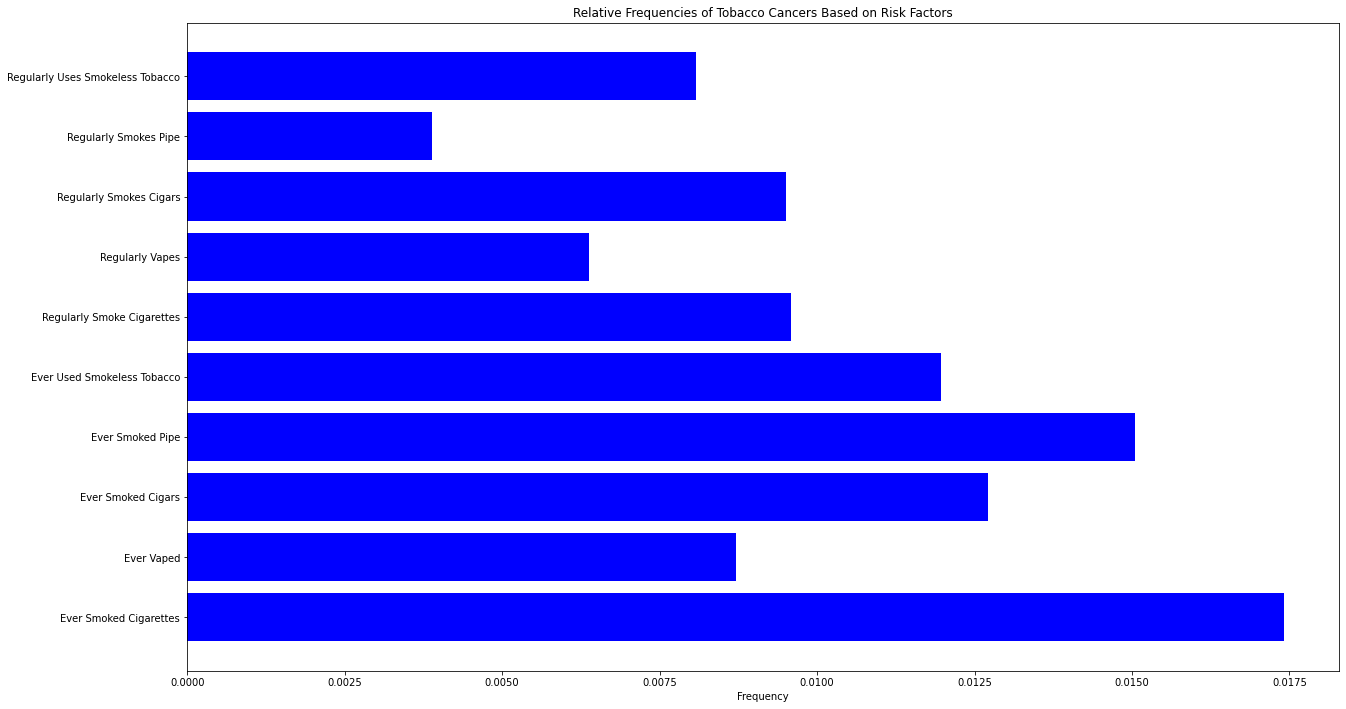

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



KeyError: ignored

In [ ]:
if __name__ == '__main__':
  main()